<a href="https://colab.research.google.com/github/VascoBartolo/ML_project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 5.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.3 MB 41.3 MB/s 
     |████████████████████████████████| 22.3 MB 1.6 MB/s 
     |████████████████████████████████| 260 kB 65.4 MB/s 
     |████████████████████████████████| 4.4 MB 41.7 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641947 sha256=26163eb52b5069b1892e7be0f035b5f5b7325599268e8a083548a38a398229c1
  Stored in directory: /root/.cache/pip/wheels/26/57/ce/ca63ad74b90273f9a682028d187645a42dce5c5255228d46c8
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7044 sha256=4d0a3b2f73e0338f3bb9a77948ec7d4a28516fb0c14034da387ea9600e1916e3
  Sto

In [46]:
data = pd.read_csv("/content/drive/MyDrive/ML_project/data.csv")

In [49]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Nova secção

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [51]:
#converted all numbers to integers

data['price'] = data['price'].astype('int')
data['bedrooms'] = data['bedrooms'].astype('int')
data['bathrooms'] = data['bathrooms'].astype('int')
data['floors'] = data['floors'].astype('int')
data['date'] = pd.to_datetime(data['date'])
data["house_age"] = data["date"].dt.year - data['yr_built']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   int64         
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   int64         
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   int64         
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [52]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,house_age
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,1.788913,2139.346957,1.485252e+04,1.459130,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,43.213696
std,5.638347e+05,0.908848,0.752185,963.206916,3.588444e+04,0.552194,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,29.731848
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000
25%,3.228750e+05,3.000000,1.000000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,17.000000
50%,4.609430e+05,3.000000,2.000000,1980.000000,7.683000e+03,1.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,38.000000
75%,6.549625e+05,4.000000,2.000000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,63.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,114.000000


In [53]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
house_age        0
dtype: int64

In [54]:
data['waterfront'].value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

In [55]:
data['view'].value_counts()

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

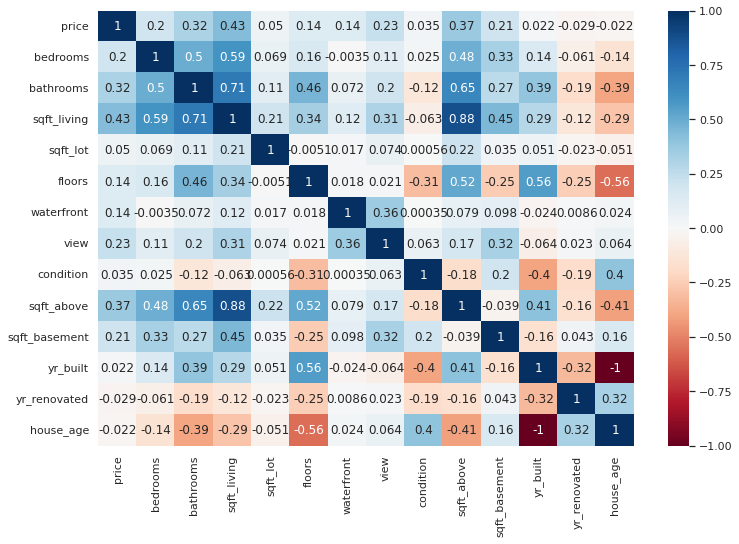

In [56]:
cor=data.corr()
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(cor, annot=True,cmap='RdBu');

Highest correlations are between area of living room, area of the house and number of bathrooms.

Regarding price the variables with higher correlation are areas of living rooms and area of the house.

In [57]:
#Now we will separate the target attribute from the features of our model
#Date of registration is not a feature for regression

x = data.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)
#x1 = data.drop(['price'], axis=1)
y = data['price']


#Created binary variable for renovation
yr_renov_bin = []
for i in range(len(data.index)):
  if data.iloc[i,10] > 0:
    yr_renov_bin.append(1)
  else: 
    yr_renov_bin.append(0)

data_clean = data.drop(['date', 'street', 'city', 'statezip', 'country','waterfront','view','yr_renovated'], axis=1)
data_clean.insert(10, "yr_renov_bin", yr_renov_bin , True)

from scipy import stats as stat

stat_summary = data_clean.describe()
stat_summary.loc['range'] = stat_summary.loc['max'] - stat_summary.loc['min']
stat_summary.loc['IQR'] = stat_summary.loc['75%'] - stat_summary.loc['25%'] # appending interquartile range
stat_summary

#Removing outliers

data_wpo = data_clean.copy()
data_wpo = data_wpo[data_wpo['price'] < (stat_summary.loc['75%']+1.5*stat_summary.loc['IQR'])[0]]
#data_wpo = data_wpo[data_wpo['bedrooms'] < (stat_summary.loc['75%']+1.5*stat_summary.loc['IQR'])[1]]
#data_wpo = data_wpo[data_wpo['bathrooms'] < (stat_summary.loc['75%']+1.5*stat_summary.loc['IQR'])[2]]
data_wpo = data_wpo[data_wpo['sqft_living'] < (stat_summary.loc['75%']+1.5*stat_summary.loc['IQR'])[3]]
data_wpo = data_wpo[data_wpo['sqft_lot'] < (stat_summary.loc['75%']+1.5*stat_summary.loc['IQR'])[4]]
#data_wpo = data_wpo[data_wpo['floors'] < (stat_summary.loc['75%']+1.5*stat_summary.loc['IQR'])[5]]
#data_wpo = data_wpo[data_wpo['condition'] < (stat_summary.loc['75%']+1.5*stat_summary.loc['IQR'])[6]]
#data_wpo = data_wpo[data_wpo['sqft_above'] < (stat_summary.loc['75%']+1.5*stat_summary.loc['IQR'])[7]]
#data_wpo = data_wpo[data_wpo['sqft_basement'] < (stat_summary.loc['75%']+1.5*stat_summary.loc['IQR'])[8]]
#data_wpo = data_wpo[data_wpo['yr_built'] < (stat_summary.loc['75%']+1.5*stat_summary.loc['IQR'])[9]]


#Removing instances with price = 0

data_wpo = data_wpo.loc[data_wpo['price'] > 0]

In [58]:
data_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renov_bin,house_age
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.0,4600.000000
mean,5.519630e+05,3.400870,1.788913,2139.346957,1.485252e+04,1.459130,3.451739,1827.265435,312.081522,1970.786304,1.0,43.213696
std,5.638347e+05,0.908848,0.752185,963.206916,3.588444e+04,0.552194,0.677230,862.168977,464.137228,29.731848,0.0,29.731848
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,1.000000,370.000000,0.000000,1900.000000,1.0,0.000000
25%,3.228750e+05,3.000000,1.000000,1460.000000,5.000750e+03,1.000000,3.000000,1190.000000,0.000000,1951.000000,1.0,17.000000
50%,4.609430e+05,3.000000,2.000000,1980.000000,7.683000e+03,1.000000,3.000000,1590.000000,0.000000,1976.000000,1.0,38.000000
75%,6.549625e+05,4.000000,2.000000,2620.000000,1.100125e+04,2.000000,4.000000,2300.000000,610.000000,1997.000000,1.0,63.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.000000,5.000000,9410.000000,4820.000000,2014.000000,1.0,114.000000


In [91]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
train, test = np.split(data_wpo.sample(frac=1), [int(0.8*len(data_wpo))])
#X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.20, random_state=1)

In [92]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[1:]].values
  y = dataframe[dataframe.columns[0]].values

  #scaler = StandardScaler()
  #X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [93]:
train, X_train, y_train = scale_dataset(train, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [94]:
"""from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy

def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y"""

'from sklearn.preprocessing import StandardScaler\nfrom imblearn.over_sampling import RandomOverSampler\nimport copy\n\ndef get_xy(dataframe, y_label, x_labels=None):\n  dataframe = copy.deepcopy(dataframe)\n  if x_labels is None:\n    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values\n  else:\n    if len(x_labels) == 1:\n      X = dataframe[x_labels[0]].values.reshape(-1, 1)\n    else:\n      X = dataframe[x_labels].values\n\n  y = dataframe[y_label].values.reshape(-1, 1)\n  data = np.hstack((X, y))\n\n  return data, X, y'

In [95]:
""" _, X_train_temp, y_train_temp = get_xy(train, "price", x_labels=["bedrooms",	"bathrooms", "sqft_living",	"sqft_lot",	"floors",	"waterfront",	"view",	"condition",	"sqft_above",	"sqft_basement",	"yr_built",	"yr_renovated"])
_, X_test_temp, y_test_temp = get_xy(test, "price", x_labels=["bedrooms",	"bathrooms", "sqft_living",	"sqft_lot",	"floors",	"waterfront",	"view",	"condition",	"sqft_above",	"sqft_basement",	"yr_built",	"yr_renovated"]) """

' _, X_train_temp, y_train_temp = get_xy(train, "price", x_labels=["bedrooms",\t"bathrooms", "sqft_living",\t"sqft_lot",\t"floors",\t"waterfront",\t"view",\t"condition",\t"sqft_above",\t"sqft_basement",\t"yr_built",\t"yr_renovated"])\n_, X_test_temp, y_test_temp = get_xy(test, "price", x_labels=["bedrooms",\t"bathrooms", "sqft_living",\t"sqft_lot",\t"floors",\t"waterfront",\t"view",\t"condition",\t"sqft_above",\t"sqft_basement",\t"yr_built",\t"yr_renovated"]) '

## Defining the algorithms we are going to use

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Fit models to training dataset
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

kn_reg = KNeighborsRegressor(n_neighbors=2)
kn_reg.fit(X_train, y_train)

lasso_reg = Lasso(normalize=True)
lasso_reg.fit(X_train, y_train) 

rf_reg = RandomForestRegressor(random_state=0)
rf_reg.fit(X_train, y_train)

xgb_reg = xgb.XGBRegressor(random_state=1)
xgb_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  


[18:17:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=1)

## Predicting inferences from training data

In [107]:
y_pred_train_lr = linear_reg.predict(X_train)
y_pred_train_kn = kn_reg.predict(X_train)
y_pred_train_lass = lasso_reg.predict(X_train)
y_pred_train_rf = rf_reg.predict(X_train)
y_pred_train_xgb = xgb_reg.predict(X_train)

## Check performance measures with test data

In [108]:
from sklearn.metrics import mean_squared_error
#Root mean squared error
rmse_lr=mean_squared_error(y_train, y_pred_train_lr, squared=False)
rmse_kn=mean_squared_error(y_train, y_pred_train_kn, squared=False)
rmse_lass=mean_squared_error(y_train, y_pred_train_lass, squared=False)
rmse_rf=mean_squared_error(y_train, y_pred_train_rf, squared=False)
rmse_xgb=mean_squared_error(y_train, y_pred_train_xgb, squared=False)

from sklearn.metrics import mean_absolute_error
#Mean absolute error
mae_lr=mean_absolute_error(y_train, y_pred_train_lr)
mae_kn=mean_absolute_error(y_train, y_pred_train_kn)
mae_lass=mean_absolute_error(y_train, y_pred_train_lass)
mae_rf=mean_absolute_error(y_train, y_pred_train_rf)
mae_xgb=mean_absolute_error(y_train, y_pred_train_xgb)

from sklearn.metrics import mean_absolute_percentage_error
#Mean absolute percentage error
mape_lr=mean_absolute_percentage_error(y_train, y_pred_train_lr)
mape_kn=mean_absolute_percentage_error(y_train, y_pred_train_kn)
mape_lass=mean_absolute_percentage_error(y_train, y_pred_train_lass)
mape_rf=mean_absolute_percentage_error(y_train, y_pred_train_rf)
mape_xgb=mean_absolute_percentage_error(y_train, y_pred_train_xgb)

from sklearn.metrics import median_absolute_error
#Median absolute error
#The median_absolute_error is particularly interesting because it is robust to outliers. The loss is calculated by taking the median of all absolute differences between the target and the prediction.
medae_lr=median_absolute_error(y_train, y_pred_train_lr)
medae_kn=median_absolute_error(y_train, y_pred_train_kn)
medae_lass=median_absolute_error(y_train, y_pred_train_lass)
medae_rf=median_absolute_error(y_train, y_pred_train_rf)
medae_xgb=median_absolute_error(y_train, y_pred_train_xgb)

from sklearn.metrics import r2_score
#R² score, the coefficient of determination
r2_lr=r2_score(y_train, y_pred_train_lr)
r2_kn=r2_score(y_train, y_pred_train_kn)
r2_lass=r2_score(y_train, y_pred_train_lass)
r2_rf=r2_score(y_train, y_pred_train_rf)
r2_xgb=r2_score(y_train, y_pred_train_xgb)

#Generate a comparison table
metrics_test = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_lass, rmse_rf, rmse_xgb],
    'MAE': [mae_lr, mae_kn, mae_lass, mae_rf, mae_xgb],
    'MAPE': [mape_lr, mape_kn, mape_lass, mape_rf, mape_xgb],
    'MEDAE': [medae_lr, medae_kn, medae_lass, medae_rf, medae_xgb],
    'R2': [r2_lr, r2_kn, r2_lass, r2_rf, r2_xgb],

},index=["LinearRegression","KNeighborsRegressor","LassoRegressor","RandomForestRegressor", "XGBoost"])

metrics_test

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,153056.246510,119636.180571,0.309896,99319.388067,0.472822
KNeighborsRegressor,105675.371016,79335.620724,0.195305,60500.000000,0.748694
LassoRegressor,153056.370879,119645.063798,0.309949,99283.748089,0.472821
RandomForestRegressor,56615.769580,43432.274398,0.111594,34738.065000,0.927868
XGBoost,134565.555228,105791.593151,0.272135,87287.015625,0.592505


# For the test sample

In [109]:
y_pred_test_lr = linear_reg.predict(X_test)
y_pred_test_kn = kn_reg.predict(X_test)
y_pred_test_lass = lasso_reg.predict(X_test)
y_pred_test_rf = rf_reg.predict(X_test)
y_pred_test_xgb = xgb_reg.predict(X_test)

In [110]:

#Root mean squared error
rmse_lr=mean_squared_error(y_test, y_pred_test_lr, squared=False)
rmse_kn=mean_squared_error(y_test, y_pred_test_kn, squared=False)
rmse_lass=mean_squared_error(y_test, y_pred_test_lass, squared=False)
rmse_rf=mean_squared_error(y_test, y_pred_test_rf, squared=False)
rmse_xgb=mean_squared_error(y_test, y_pred_test_xgb, squared=False)

#Mean absolute error
mae_lr=mean_absolute_error(y_test, y_pred_test_lr)
mae_kn=mean_absolute_error(y_test, y_pred_test_kn)
mae_lass=mean_absolute_error(y_test, y_pred_test_lass)
mae_rf=mean_absolute_error(y_test, y_pred_test_rf)
mae_xgb=mean_absolute_error(y_test, y_pred_test_xgb)

#Mean absolute percentage error
mape_lr=mean_absolute_percentage_error(y_test, y_pred_test_lr)
mape_kn=mean_absolute_percentage_error(y_test, y_pred_test_kn)
mape_lass=mean_absolute_percentage_error(y_test, y_pred_test_lass)
mape_rf=mean_absolute_percentage_error(y_test, y_pred_test_rf)
mape_xgb=mean_absolute_percentage_error(y_test, y_pred_test_xgb)

#Median absolute error
#The median_absolute_error is particularly interesting because it is robust to outliers. The loss is calculated by taking the median of all absolute differences between the target and the prediction.
medae_lr=median_absolute_error(y_test, y_pred_test_lr)
medae_kn=median_absolute_error(y_test, y_pred_test_kn)
medae_lass=median_absolute_error(y_test, y_pred_test_lass)
medae_rf=median_absolute_error(y_test, y_pred_test_rf)
medae_xgb=median_absolute_error(y_test, y_pred_test_xgb)

#R² score, the coefficient of determination
r2_lr=r2_score(y_test, y_pred_test_lr)
r2_kn=r2_score(y_test, y_pred_test_kn)
r2_dt=r2_score(y_test, y_pred_test_lass)
r2_rf=r2_score(y_test, y_pred_test_rf)
r2_xgb=r2_score(y_test, y_pred_test_xgb)

#Generate a comparison table
metrics_test = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_lass, rmse_rf, rmse_xgb],
    'MAE': [mae_lr, mae_kn, mae_lass, mae_rf, mae_xgb],
    'MAPE': [mape_lr, mape_kn, mape_lass, mape_rf, mape_xgb],
    'MEDAE': [medae_lr, medae_kn, medae_lass, medae_rf, medae_xgb],
    'R2': [r2_lr, r2_kn, r2_dt, r2_rf, r2_xgb],

},index=["LinearRegression","KNeighborsRegressor","LassoRegressor","RandomForestRegressor", "XGBoost"])

metrics_test

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,157142.631389,123293.375724,0.310878,105288.290997,0.390194
KNeighborsRegressor,186972.807019,145148.977004,0.352827,118750.000000,0.136702
LassoRegressor,157131.461595,123299.655324,0.310925,105015.568376,0.390280
RandomForestRegressor,156338.441950,120956.609163,0.303332,96904.100000,0.396419
XGBoost,153587.841210,119477.551002,0.298621,98167.656250,0.417471


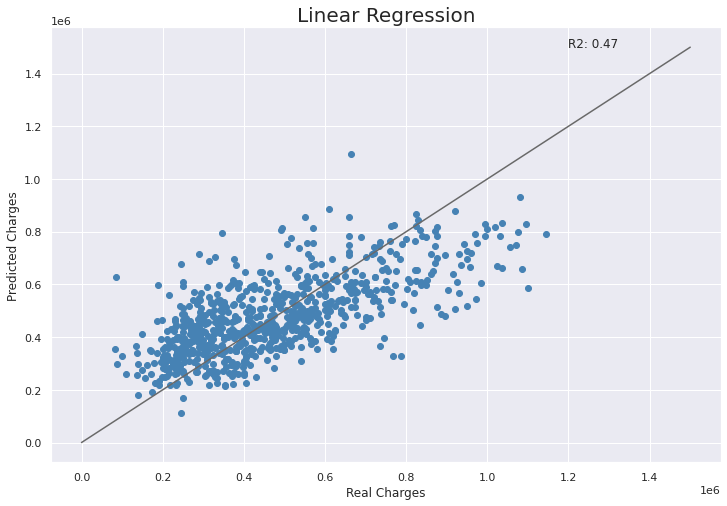

In [69]:
plt.scatter(y_test, y_pred_test_lr, c='steelblue')
plt.plot([0,1500000], [0,1500000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_lr,2)), [1200000, 1500000])
plt.title('Linear Regression', fontsize=20)
plt.show()

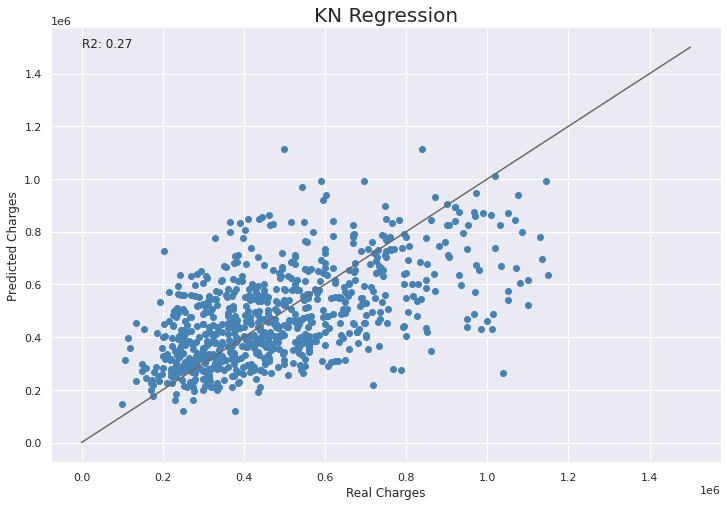

In [171]:
plt.scatter(y_test, y_pred_test_kn, c='steelblue')
plt.plot([0,1500000], [0,1500000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_kn,2)), [0,1500000], [0,1500000])
plt.title('KN Regression', fontsize=20)
plt.show()

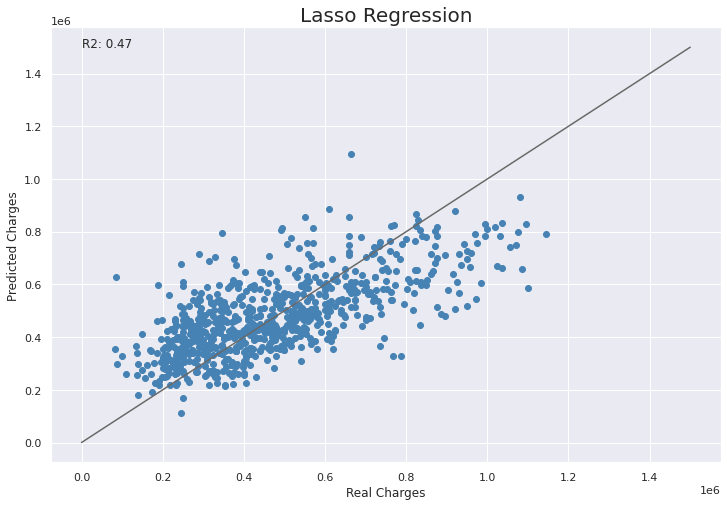

In [90]:
plt.scatter(y_test, y_pred_test_lass, c='steelblue')
plt.plot([0,1500000], [0,1500000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_dt,2)), [0,1500000], [0,1500000])
plt.title('Lasso Regression', fontsize=20)
plt.show()

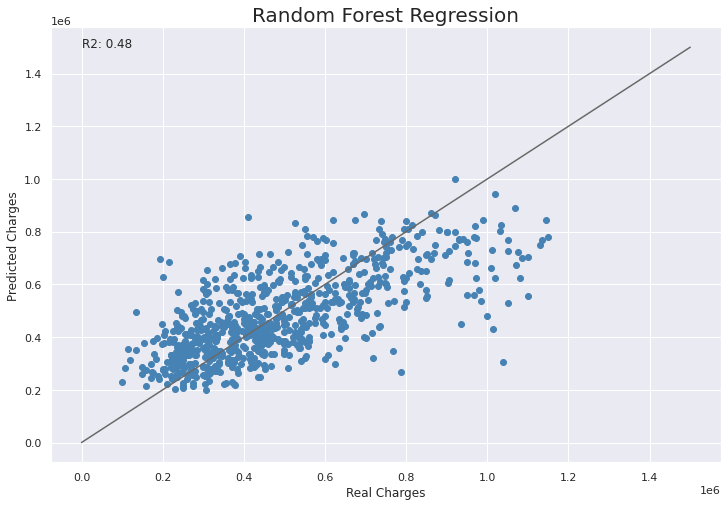

In [173]:
plt.scatter(y_test, y_pred_test_rf, c='steelblue')
plt.plot([0,1500000], [0,1500000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_rf,2)), [0,1500000], [0,1500000])
plt.title('Random Forest Regression', fontsize=20)
plt.show()

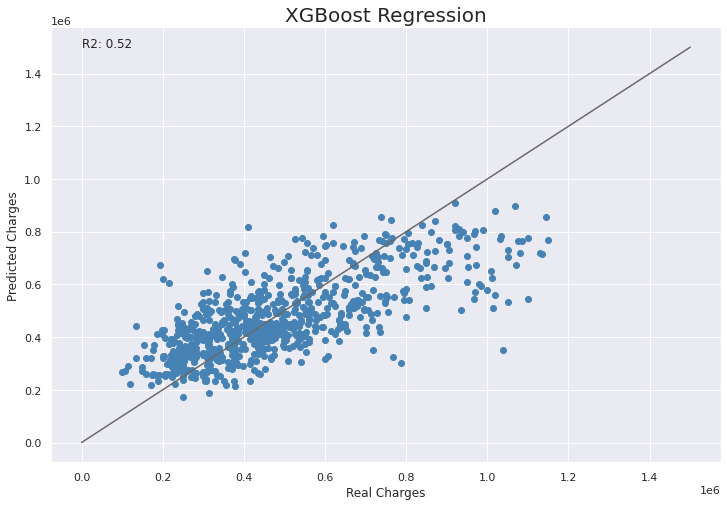

In [174]:
plt.scatter(y_test, y_pred_test_xgb, c='steelblue')
plt.plot([0,1500000], [0,1500000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_xgb,2)), [0,1500000], [0,1500000])
plt.title('XGBoost Regression', fontsize=20)
plt.show()

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Initialze the estimators
#regr_lr = LinearRegression()
#regr_kn = KNeighborsRegressor()
#regr_dt = DecisionTreeRegressor(random_state=0)
#regr_rf = RandomForestRegressor(random_state=0)
#regr_xgb = xgb.XGBRegressor(random_state=0)


# Initiaze the hyperparameters for each dictionary
param_lr = {}
param_lr['regressor'] = [linear_reg]

param_rf = {}
param_rf['regressor__n_estimators'] = [5, 10, 20, 50, 100, 200]
param_rf['regressor__max_depth'] = [1, 3, 5, 10, 20]
param_rf['regressor'] = [rf_reg]

param_kn = {}
param_kn['regressor__n_neighbors'] = [1,2,3,4,5,6,7,10]
param_kn['regressor__weights'] = ['uniform', 'distance']
param_kn['regressor'] = [kn_reg]

param_lass = {}
param_lass['alpha'] = [0,0.2,0.5,0.7,1]
param_lass['normalize'] = [False, True]
param_lass['max_iter'] = [500,1000,2000,3000]
param_lass['regressor'] = [lasso_reg]

param_xgb = {}
param_xgb['regressor__max_depth'] = [3,4,5,6,10,12,14,15]
param_xgb['regressor__eta'] = [0.1, 0.2, 0.3, 0.4]
param_xgb['regressor__subsample']=[0.5, 1]
param_xgb['regressor__colsample_bytree'] = [0.3,0.5,0.7, 0.9, 1]
param_xgb['regressor__num_parallel_tree'] = [1, 3,4,5, 7,8,10]
param_xgb['regressor'] = [xgb_reg]

pipeline = Pipeline([('regressor', DummyRegressor)])
params = [param_lr, param_rf, param_kn, param_xgb]

# Train the grid search model
gs = GridSearchCV(pipeline,
                  params, 
                  cv = 5, 
                  n_jobs = 1, 
                  verbose = 0, 
                  return_train_score=True, 
                  scoring='neg_root_mean_squared_error')

best_model = gs.fit(X_train, y_train)

# See which model was the best
best_model.best_estimator_.get_params()['regressor']

[18:21:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [176]:
best_model.score(X_train, y_train)

-135659.0033178209

In [177]:
# Check the best model performance 
y_pred = best_model.predict(X_test)
#mse_bestmodel=mean_squared_error(y_test, y_pred)
rmse_bestmodel=mean_squared_error(y_test, y_pred, squared=False)
mae_bestmodel=mean_absolute_error(y_test, y_pred)
mape_bestmodel=mean_absolute_percentage_error(y_test, y_pred)
medae_bestmodel=median_absolute_error(y_test, y_pred)
r2_bestmodel=r2_score(y_test, y_pred)

#Generate a comparison table
metrics_bestmodel = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_lass, rmse_rf, rmse_xgb, rmse_bestmodel],
    'MAE': [mae_lr, mae_kn, mae_lass, mae_rf, mae_xgb, mae_bestmodel],
    'MAPE': [mape_lr, mape_kn, mape_lass, mape_rf, mape_xgb, mape_bestmodel],
    'MEDAE': [medae_lr, medae_kn, medae_lass, medae_rf, medae_xgb, medae_bestmodel],
    'R2': [r2_lr, r2_kn, r2_dt, r2_rf, r2_xgb, r2_bestmodel],

},index=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor", "XGBoost", "Best Model"])

metrics_bestmodel

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,155482.957756,121332.042193,0.291430,100838.416332,0.485035
KNeighborsRegressor,185098.031585,140873.272668,0.332831,110000.000000,0.270180
DecisionTreeRegressor,203909.482323,152915.212878,0.356684,115150.000000,0.114299
RandomForestRegressor,155877.586038,118296.412799,0.285762,94400.090000,0.482417
XGBoost,149449.250055,114747.695877,0.273005,92161.875000,0.524227
Best Model,149170.169131,114908.901959,0.272538,91852.406250,0.526002
